In [145]:
from signal_process_utils import Song, generate_frequency_table

import os
import numpy as np
from tqdm import tqdm_notebook as tqdm
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
%matplotlib inline

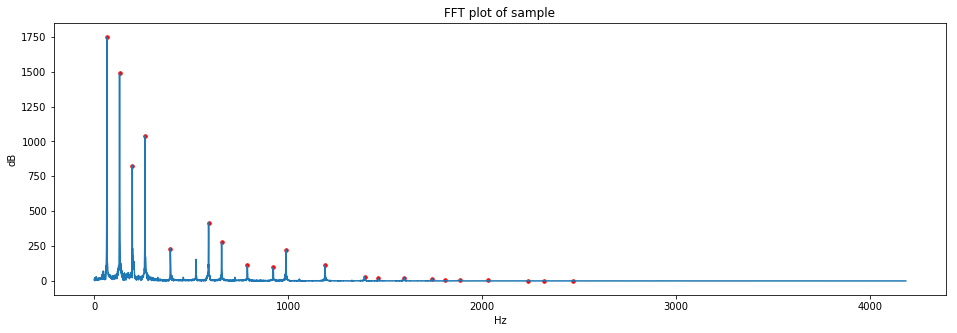

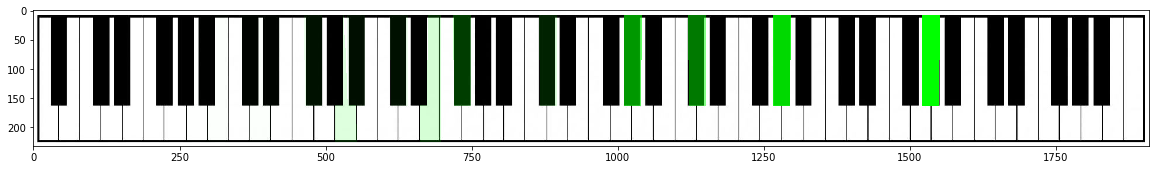

In [88]:
song_file = os.path.join('assets', 'twinkle.mp3')
self = Song(song_file)
sample_data = self.sample(5000, plot=True)
piano_lit = self.generate_keyboard(sample_data)

plt.figure(figsize=(20, 3))
plt.imshow(piano_lit)
plt.show()

In [89]:
low_pass = self.seg.low_pass_filter(s.max_freq)

In [209]:
freqs, times, amplitudes = low_pass.spectrogram(window_length_s=0.1, overlap=0.5)
print(times.shape, freqs.shape, amplitudes.shape)

# slice out only the ranges we are interested in
max_freq_idx = np.argmin(freqs < self.max_freq)
times = times/2
freqs = freqs[:max_freq_idx]
amplitudes = amplitudes[:max_freq_idx, :]

def log_amps(a): return 10 * np.log10(a + 1e-9)

(1896,) (2401,) (2401, 1896)


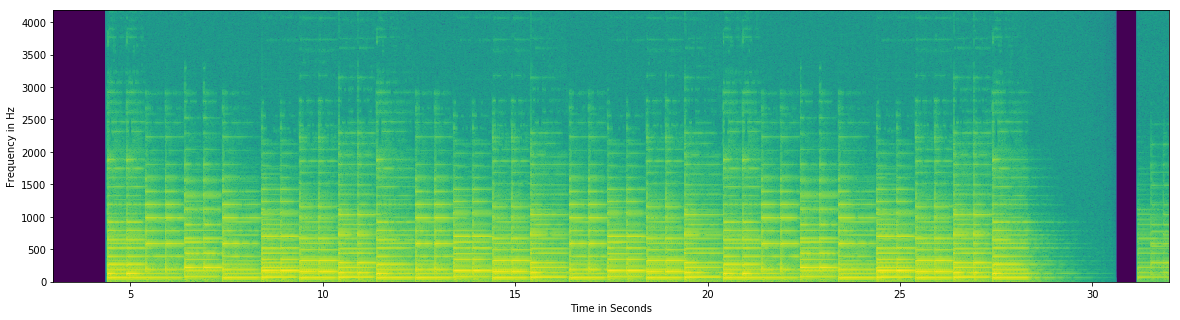

In [212]:
# Plot
plt.figure(figsize=(20, 5))
plt.pcolormesh(times, freqs, log_amps(amplitudes))
plt.axis([3, 32, 0, self.max_freq])
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()

In [246]:
def threshold_amplitudes(indices, j):
    arr = dominant_amplitudes[:, j]
    ia = np.indices(arr.shape)
    not_indices = np.setxor1d(ia, indices)
    arr[not_indices] = 0
    dominant_amplitudes[:, j] = arr

dominant_amplitudes = amplitudes.copy()
for t in range(len(times)):
    peaks = argrelextrema(data=amplitudes[:, t],
                          comparator=np.greater,
                          order=15)[0]
    threshold_amplitudes(peaks, t)

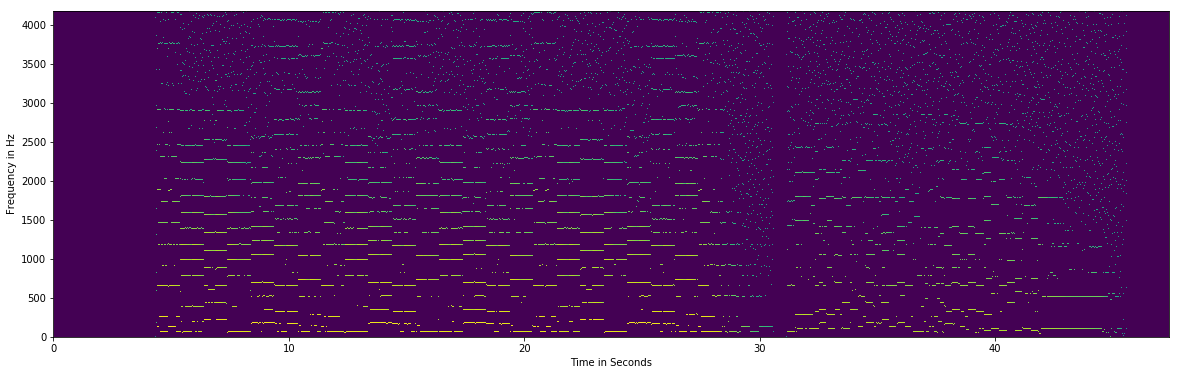

In [247]:
# Plot
plt.figure(figsize=(20, 6))
plt.pcolormesh(times, freqs, log_amps(dominant_amplitudes))
plt.axis([0, times[-1], 0, self.max_freq])
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")
plt.show()